## Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Importing data from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/modified_train_energy_data.csv")
train_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,1963.95
1,Commercial,44372,66,45,16.72,Weekday,5494.99
2,Industrial,19255,37,17,14.30,Weekend,3751.24
3,Residential,13265,14,41,32.82,Weekday,2259.14
4,Commercial,13375,26,18,11.92,Weekday,3029.17


In [ ]:
test_df = pd.read_csv("/content/drive/My Drive/modified_test_energy_data.csv")
test_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2115.57
1,Commercial,27583,56,23,23.07,Weekend,3283.80
2,Commercial,45313,4,44,33.56,Weekday,4817.83
3,Residential,41625,84,17,27.39,Weekend,4874.30
4,Residential,36720,58,47,17.08,Weekday,4070.59


## Basic Pre-Processing

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        825 non-null    object 
 1   Square Footage       825 non-null    int64  
 2   Number of Occupants  825 non-null    int64  
 3   Appliances Used      825 non-null    int64  
 4   Average Temperature  825 non-null    float64
 5   Day of Week          825 non-null    object 
 6   Energy Consumption   825 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 45.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        275 non-null    object 
 1   Square Footage       275 non-null    int64  
 2   Number of Occupants  275 non-null    int64  
 3   Appliances Used      275 non-null    int64  
 4   Average Temperature  275 non-null    float64
 5   Day of Week          275 non-null    object 
 6   Energy Consumption   275 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 15.2+ KB


In [ ]:
df = pd.concat([train_df, test_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 274
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 68.8+ KB


In [ ]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,1963.95
1,Commercial,44372,66,45,16.72,Weekday,5494.99
2,Industrial,19255,37,17,14.30,Weekend,3751.24
3,Residential,13265,14,41,32.82,Weekday,2259.14
4,Commercial,13375,26,18,11.92,Weekday,3029.17


In [ ]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Building Type'].value_counts()

,count
Building Type,
Residential,387
Commercial,362
Industrial,351


In [ ]:
df['Day of Week'].value_counts()

,count
Day of Week,
Weekday,551
Weekend,549


## Exploratory Data Analysis

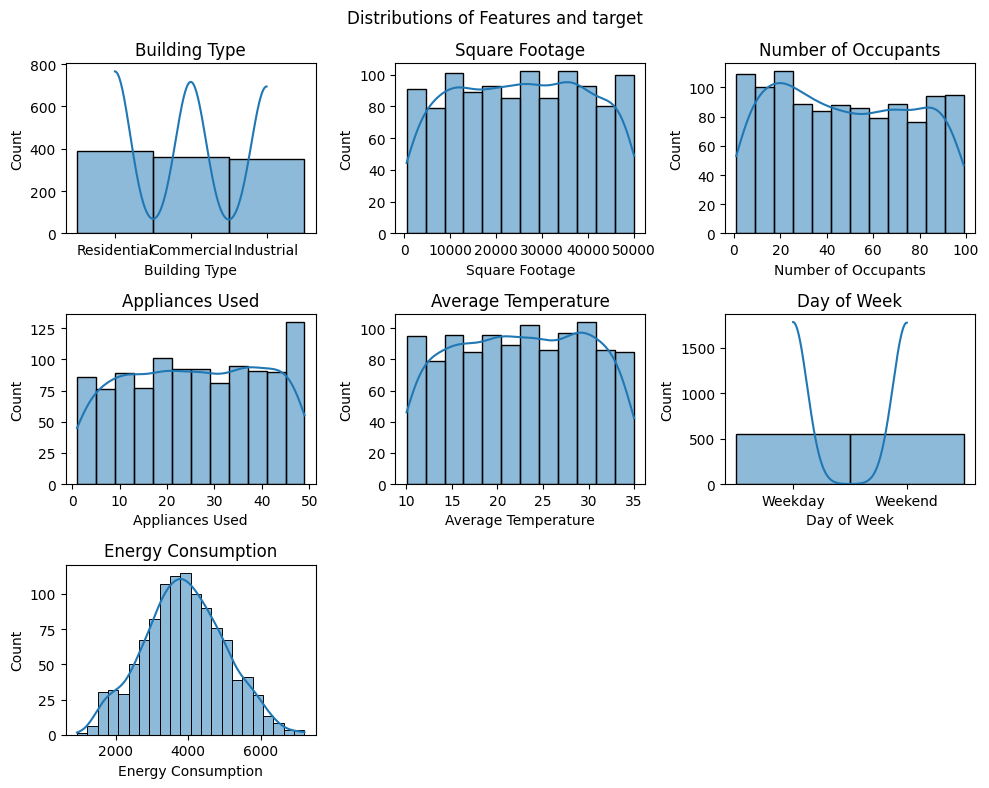

In [ ]:
plt.figure(figsize=(10,8))

for i, col in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  sns.histplot(df[col], kde=True)
  plt.title(col)
plt.suptitle('Distributions of Features and target')
plt.tight_layout()


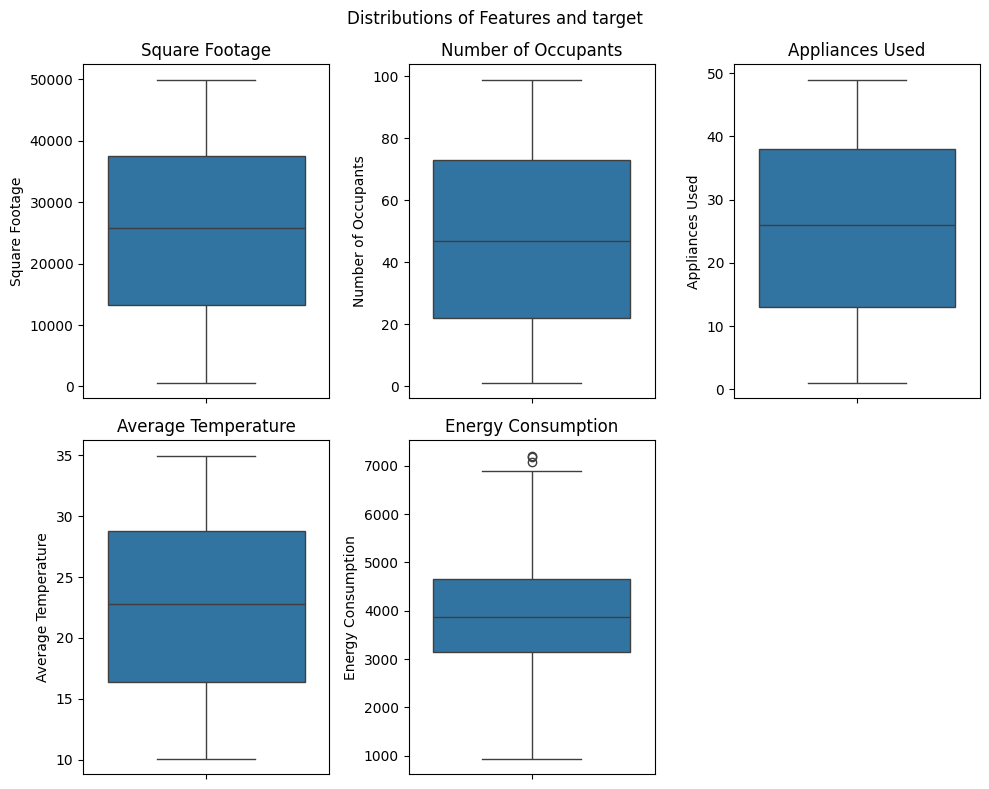

In [ ]:
plt.figure(figsize=(10,8))

for i, col in enumerate(df.select_dtypes(include='number').columns):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.suptitle('Distributions of Features and target')
plt.tight_layout()

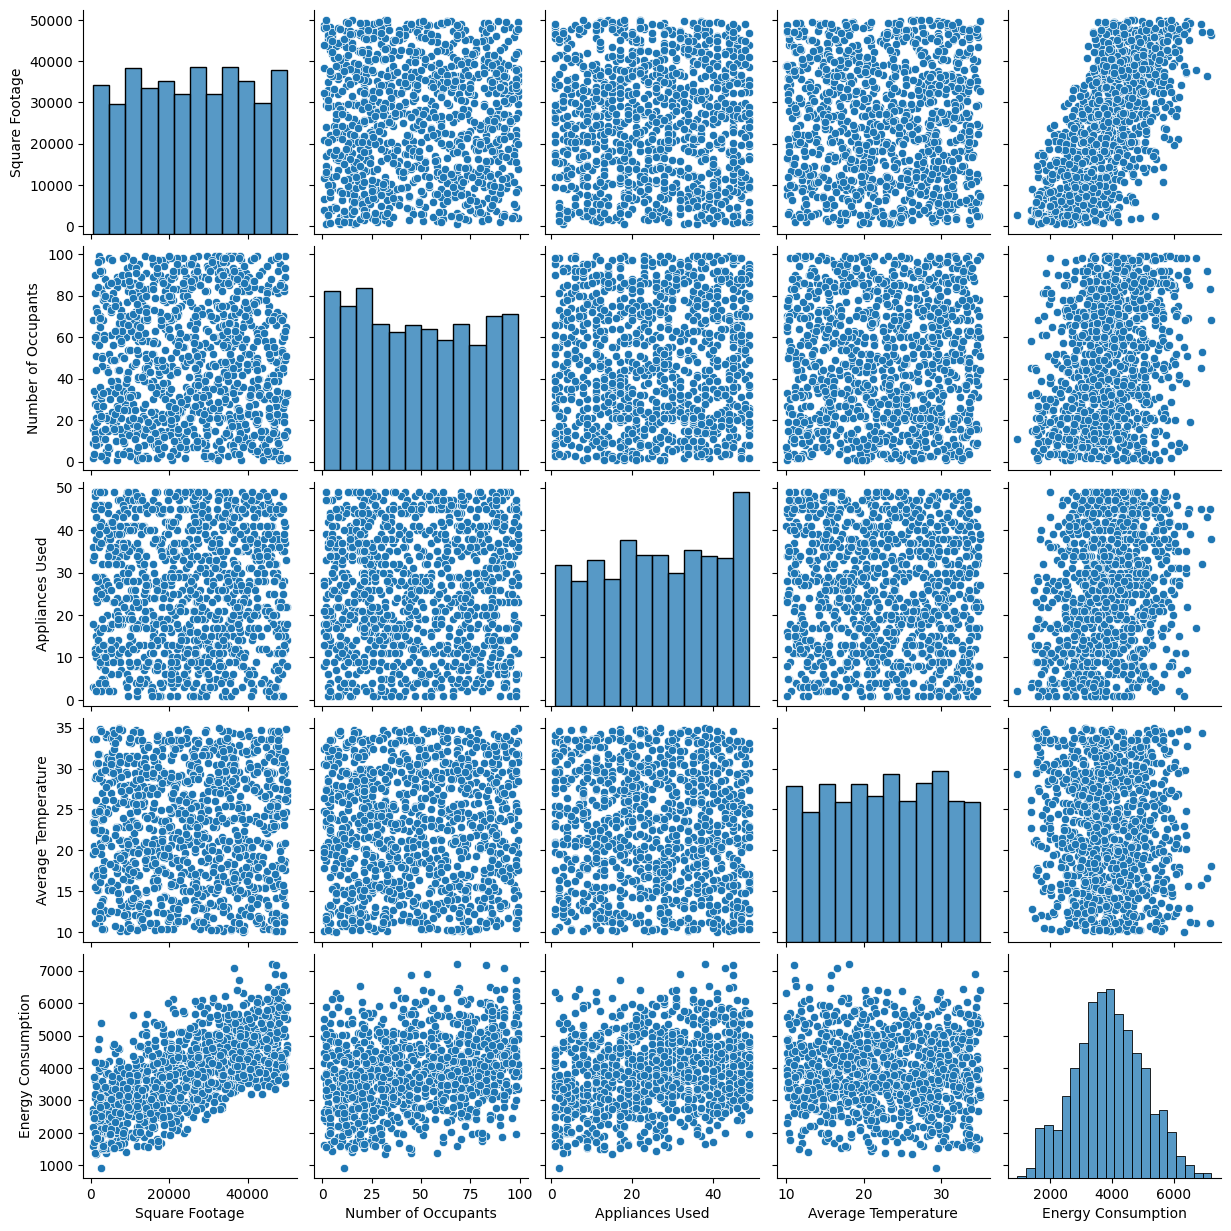

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))

<Figure size 800x600 with 0 Axes>

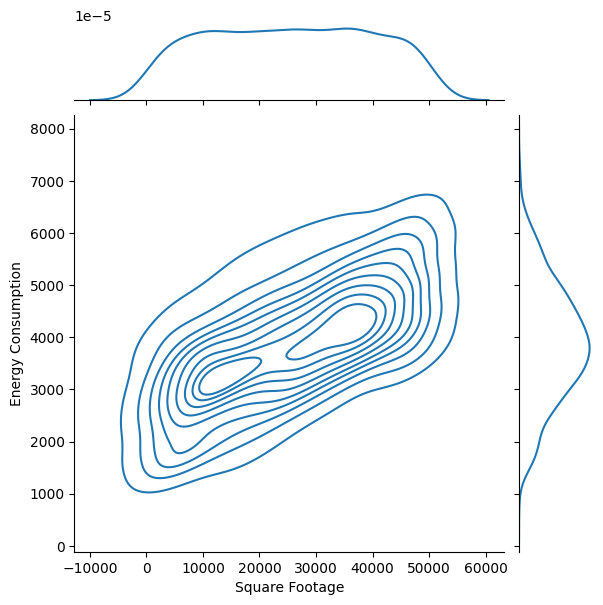

In [ ]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Square Footage', y ='Energy Consumption', data=df, kind='kde')

<Axes: >

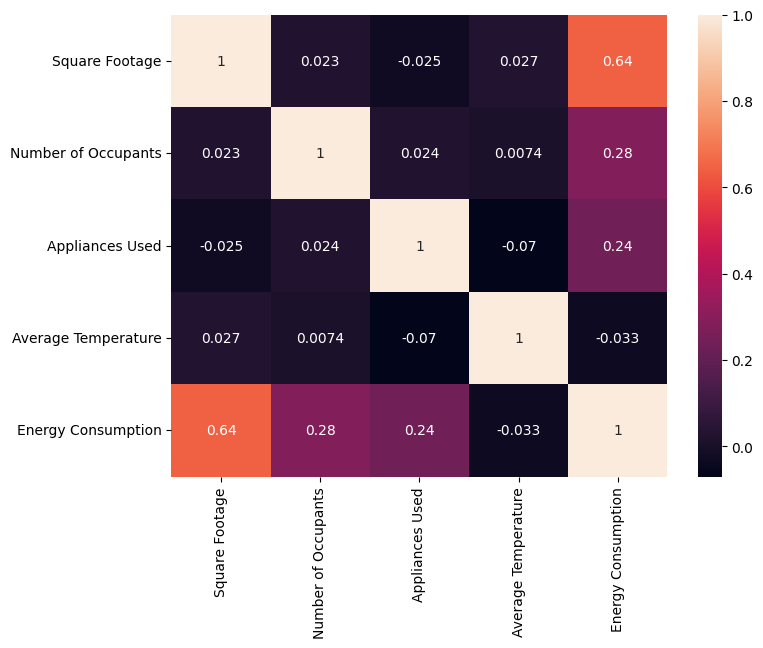

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

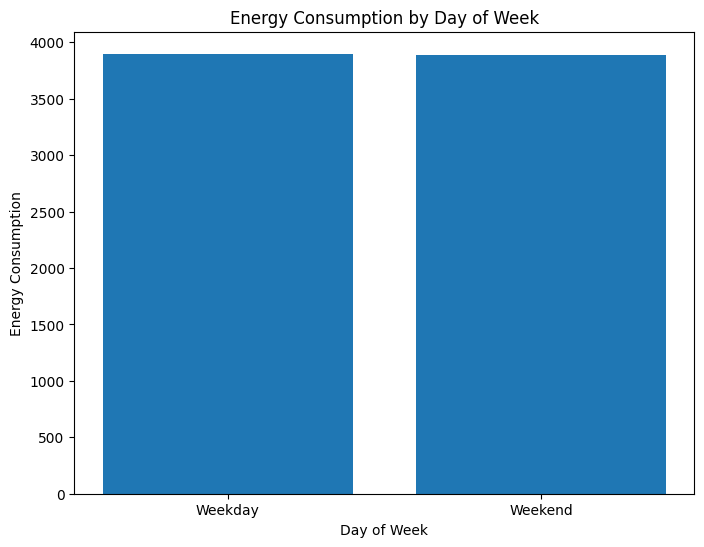

In [ ]:
plt.figure(figsize=(8,6))
energy_consumption_by_weekdays = df.groupby('Day of Week')['Energy Consumption'].mean()
plt.bar(energy_consumption_by_weekdays.index, energy_consumption_by_weekdays.values)
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Day of Week')
plt.show()

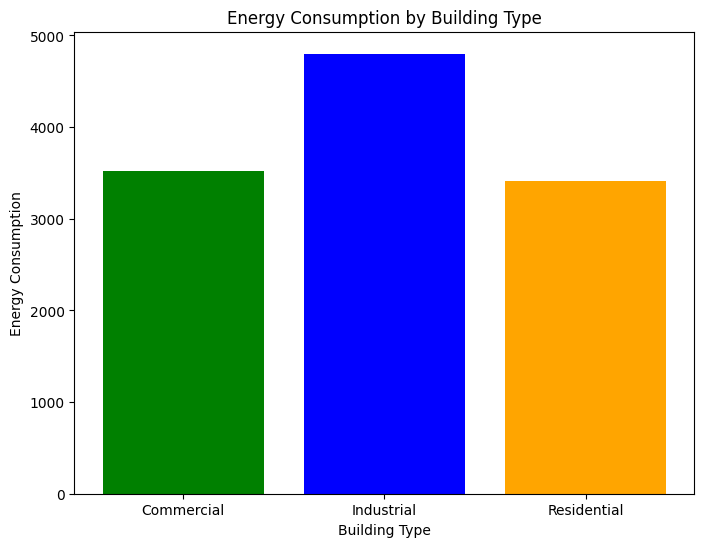

In [ ]:
plt.figure(figsize=(8,6))
energy_consumption_by_building_type = df.groupby('Building Type')['Energy Consumption'].mean()
plt.bar(energy_consumption_by_building_type.index, energy_consumption_by_building_type.values, color=['green', 'blue', 'orange'])
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Building Type')
plt.show()

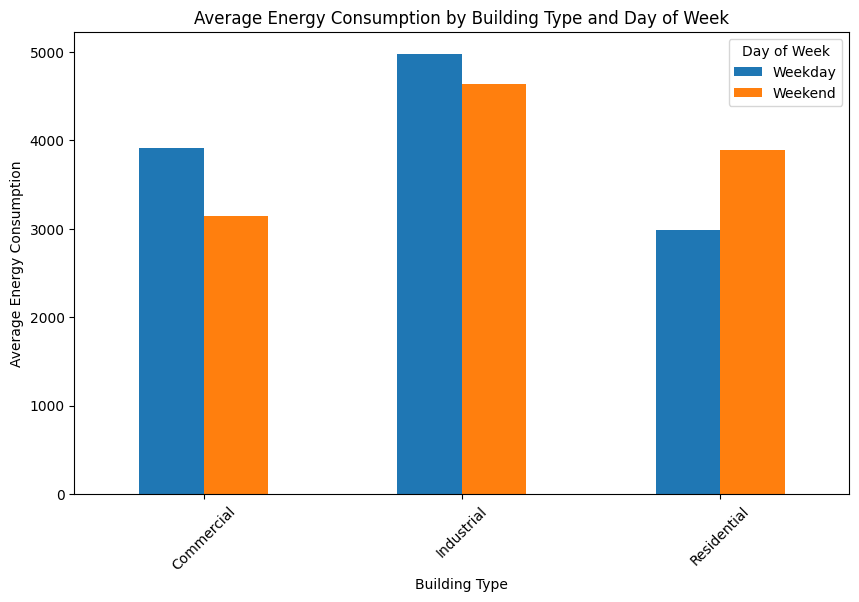

In [ ]:
avg_consumption = df.groupby(['Building Type','Day of Week'])['Energy Consumption'].mean().unstack()

avg_consumption.plot(kind='bar', figsize=(10,6))

plt.xlabel("Building Type")
plt.ylabel("Average Energy Consumption")
plt.title("Average Energy Consumption by Building Type and Day of Week")
plt.xticks(rotation=45)
plt.show()

## Data Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 274
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 68.8+ KB


In [ ]:
num_cols = df.select_dtypes(include='number').columns.drop('Energy Consumption')
num_cols

Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Building Type', 'Day of Week'], dtype='object')

In [ ]:
X = df.drop('Energy Consumption', axis=1)
y = df['Energy Consumption']

print(X.shape)
print(y.shape)

(1100, 6)
(1100,)


## Splitting data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(880, 6)
(220, 6)
(880,)
(220,)


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()
model = LinearRegression()

preprocessor = ColumnTransformer([
    ('cat',encoder, cat_cols),
    ('num', scaler, num_cols)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipe


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['Building Type', 'Day of Week'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['Building Type', 'Day of Week'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
pipe.score(X_train, y_train)

0.8412560101317629

In [ ]:
pipe.score(X_test, y_test)

0.8251003198432065

In [ ]:
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 213086.80764376407
Mean Absolute Error: 439.1804526879912
Root Mean Squared Error: 461.61326632124
R-squared: 0.8251003198432065


## Model Training

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__alpha' : np.linspace(0.01,0.99,20)
}
ridge_model = Ridge()
pipe_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ridge_model)
])
grid_search = GridSearchCV(estimator=pipe_ridge, param_grid=param_grid, cv=5, scoring='r2',n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best params are:",grid_search.best_params_)
print("Best score is:",grid_search.best_score_)

Best params are: {'model__alpha': np.float64(0.99)}
Best score is: 0.8346426118046135


In [ ]:
lasso_model = Lasso(max_iter=10000)  # need more iterations for convergence
pipe_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lasso_model)
])
grid_lasso = GridSearchCV(pipe_lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train, y_train)

print("Best params (Lasso):", grid_lasso.best_params_)
print("Best score (Lasso):", grid_lasso.best_score_)

Best params (Lasso): {'model__alpha': np.float64(0.01)}
Best score (Lasso): 0.8346186272495167


In [ ]:
X_dummies = pd.get_dummies(X, columns=cat_cols)
X_dummies.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
0,7063,76,10,29.84,False,False,True,True,False
1,44372,66,45,16.72,True,False,False,True,False
2,19255,37,17,14.30,False,True,False,False,True
3,13265,14,41,32.82,False,False,True,True,False
4,13375,26,18,11.92,True,False,False,True,False


In [ ]:
model = LinearRegression()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_dummies, y, cv=5, scoring="r2")
print(scores, scores.mean())

[0.84349726 0.83092382 0.84153058 0.83010635 0.7301946 ] 0.8152505221463935


Text(0, 0.5, 'Residuals')

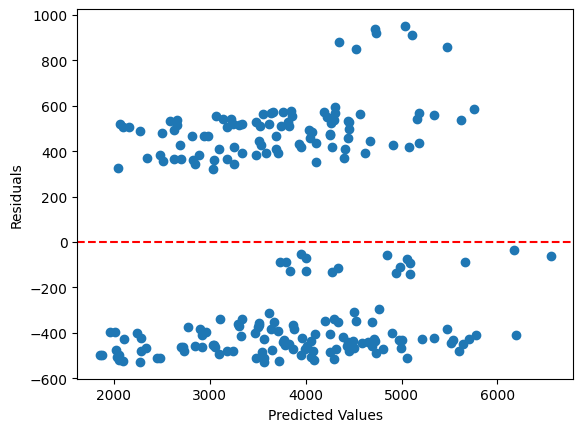

In [ ]:
#plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_dummies, y, cv=5, scoring="r2")
print("Decision Tree Cross-Validation R-squared scores:", dt_cv_scores)
print("Mean R-squared:", dt_cv_scores.mean())

Decision Tree Cross-Validation R-squared scores: [0.74868371 0.71397176 0.72708674 0.72945124 0.69350843]
Mean R-squared: 0.7225403749188721


In [ ]:
from sklearn.model_selection import validation_curve
def ModelComplexity(X, y, model):
    max_depth = np.arange(1,15)
    train_scores, test_scores = validation_curve(model, X, y,param_name='max_depth', param_range=max_depth, cv=5, scoring='r2')
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(max_depth, train_mean, label='Training Score', color='blue')
    plt.plot(max_depth, test_mean, label='Test Score', color='red')
    plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(max_depth, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
    plt.xlabel('Max Depth')
    plt.ylabel('R-squared')
    plt.title('Validation Curve')
    plt.legend()
    plt.show()

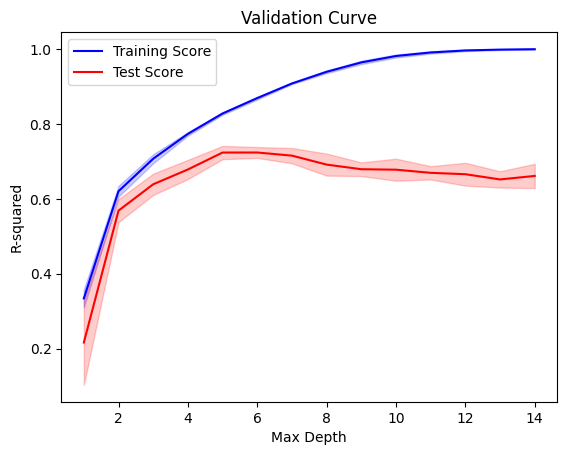

In [ ]:
model = DecisionTreeRegressor()
ModelComplexity(X_dummies, y, model)

In [ ]:
from sklearn.model_selection import learning_curve
def ModelLearning(X, y, model):
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8, 9)).astype(int)
    sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=train_sizes, scoring='r2')
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(sizes, train_mean, label='Training Score', color='blue')
    plt.plot(sizes, test_mean, label='Test Score', color='red')
    plt.fill_between(sizes, train_mean-train_std, train_mean+train_std, color='blue', alpha=0.2)
    plt.fill_between(sizes, test_mean-test_std, test_mean+test_std, color='red', alpha=0.2)
    plt.xlabel('Training Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

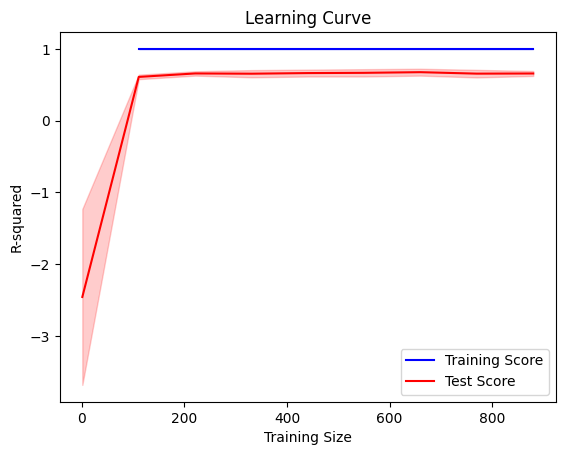

In [ ]:
model_dt = DecisionTreeRegressor(max_depth=8, random_state=42)
ModelLearning(X_dummies, y, model)

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=8, random_state=42)
pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('model', dt_model)
])
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['Building Type', 'Day of Week'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature'],
      dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=8, random_state=42))])

In [ ]:
pipe_dt.score(X_train, y_train)

0.9495855265118249

In [ ]:
pipe_dt.score(X_test, y_test)

0.7293610501882279

In [ ]:
feature_importances = pipe_dt.named_steps['model'].feature_importances_
feature_names = pipe_dt.named_steps['preprocessor'].get_feature_names_out()
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
5,num__Square Footage,0.439384
1,cat__Building Type_Industrial,0.342916
6,num__Number of Occupants,0.089119
7,num__Appliances Used,0.080517
8,num__Average Temperature,0.028320
3,cat__Day of Week_Weekday,0.007048
0,cat__Building Type_Commercial,0.004558
2,cat__Building Type_Residential,0.004207
4,cat__Day of Week_Weekend,0.003932


<Axes: xlabel='Importance', ylabel='Feature'>

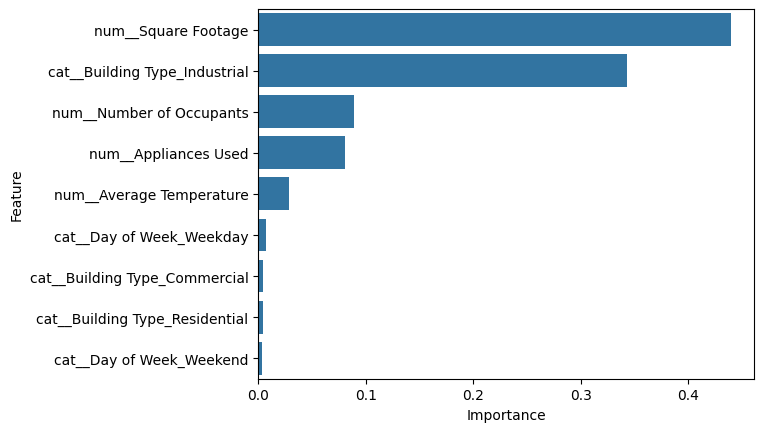

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation on the Random Forest model
rf_scores = cross_val_score(rf_model, X_dummies, y, cv=5, scoring="r2")

print("Random Forest Cross-Validation R-squared scores:", rf_scores)
print("Mean R-squared:", rf_scores.mean())

Random Forest Cross-Validation R-squared scores: [0.83892919 0.79863147 0.83856503 0.82565319 0.7429589 ]
Mean R-squared: 0.8089475557087358


In [ ]:
rf_model = RandomForestRegressor(n_estimators = 50, random_state=42)
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['Building Type', 'Day of Week'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [ ]:
pipe_rf.score(X_train, y_train)

0.9750786870188177

In [ ]:
pipe_rf.score(X_test, y_test)

0.8219298303686766

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_estimators' : [10, 20, 50, 100],
    'model__alpha' : np.linspace(0.01,0.99,20),
    # 'model__max_depth' : [1, 2, 3, 4, 5],
    # 'model__min_samples_split' : [2,5,10],
    # 'model__min_samples_leaf' : [1,2,4]
}
gbr_model = GradientBoostingRegressor(random_state=42)
pipe_gbr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gbr_model)
])
grid_search = GridSearchCV(estimator=pipe_gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)

Best parameters: {'model__alpha': np.float64(0.01), 'model__n_estimators': 100}
Best R-squared score: 0.9069005288490857


In [ ]:
pipe_gbr.fit(X_train, y_train)
print(pipe_gbr.score(X_train, y_train))
print(pipe_gbr.score(X_test, y_test))

0.9623126755141727
0.9233235373977655


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=65, random_state=42)
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['Building Type', 'Day of Week'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature'],
      dtype='object'))])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=65, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
pipe_xgb.score(X_train, y_train)

0.9984782931176949

In [ ]:
pipe_xgb.score(X_test, y_test)

0.8765746578674962

## Model Selection

In [ ]:
# Get train and test scores for each model
lr_train_score = pipe.score(X_train, y_train)
lr_test_score = pipe.score(X_test, y_test)

dt_train_score = pipe_dt.score(X_train, y_train)
dt_test_score = pipe_dt.score(X_test, y_test)

rf_train_score = pipe_rf.score(X_train, y_train)
rf_test_score = pipe_rf.score(X_test, y_test)

gbr_train_score = pipe_gbr.score(X_train, y_train)
gbr_test_score = pipe_gbr.score(X_test, y_test)


xgb_train_score = pipe_xgb.score(X_train, y_train)
xgb_test_score = pipe_xgb.score(X_test, y_test)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Train R-squared': [lr_train_score, dt_train_score, rf_train_score, gbr_train_score, xgb_train_score],
    'Test R-squared': [lr_test_score, dt_test_score, rf_test_score, gbr_test_score, xgb_test_score]
})

# Display the DataFrame
display(scores_df)

,Model,Train R-squared,Test R-squared
0,Linear Regression,0.841256,0.825100
1,Decision Tree,0.949586,0.729361
2,Random Forest,0.975079,0.821930
3,Gradient Boosting,0.962313,0.923324
4,XGBoost,0.998478,0.876575


In [ ]:
y_pred = pipe_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)+
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 216949.53329420602
Mean Absolute Error: 413.9161500000001
Root Mean Squared Error: 465.7784165182045
R-squared: 0.8219298303686766


In [ ]:
error_percent = rmse / y_test.mean() * 100
print(f"Relative RMSE: {error_percent:.2f}%")

Relative RMSE: 12.20%


Text(0.5, 1.0, 'Actual vs. Predicted Energy Consumption')

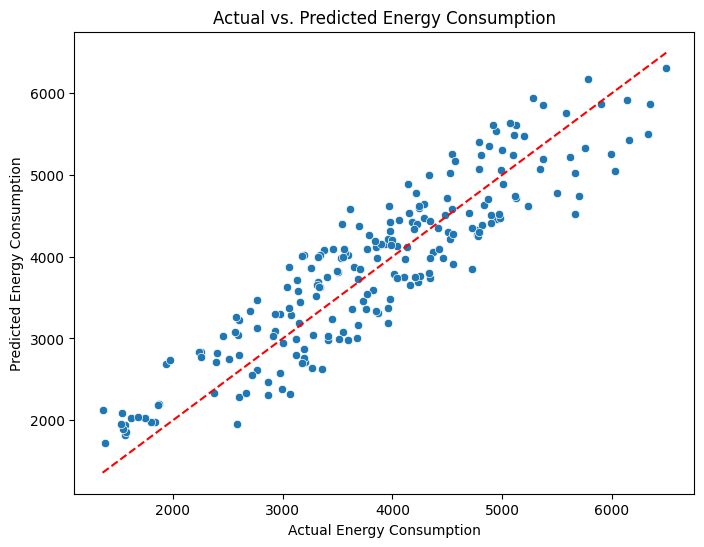

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='ideal line')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption')

Text(0.5, 1.0, 'Residuals vs. Actual Energy Consumption')

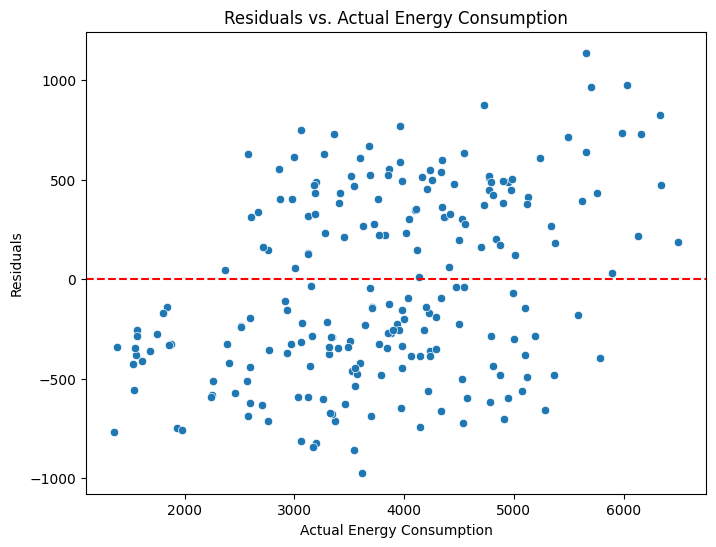

In [ ]:
plt.figure(figsize=(8,6))
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Energy Consumption')

Text(0.5, 1.0, 'Distribution of Residuals')

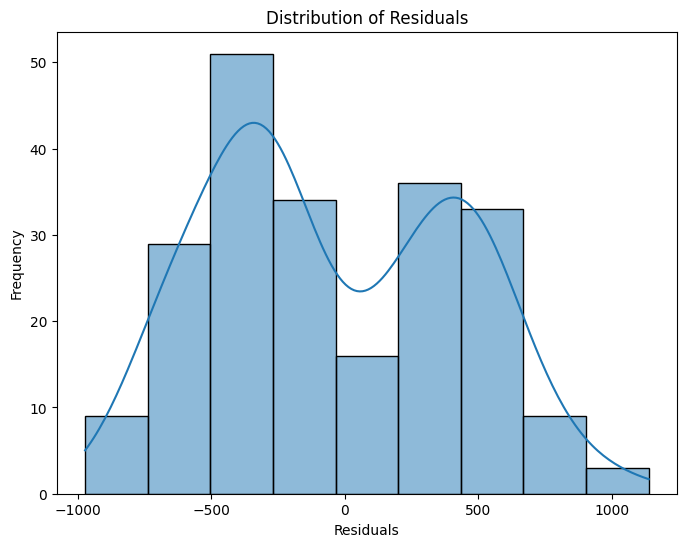

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

## Creating .pkl file after training

In [ ]:
import joblib

joblib.dump(pipe_gbr, '/content/drive/My Drive/gradient_boosting_regressor_model.pkl')

print("Gradient Boosting Regressor model saved successfully!")

Gradient Boosting Regressor model saved successfully!
